In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

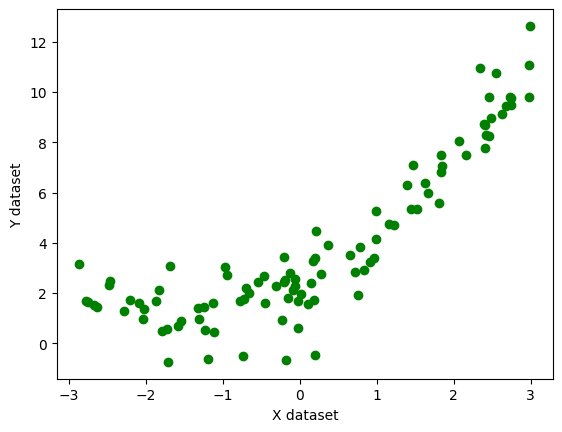

In [25]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100,1) ## quadratic equation.0.5x^2+1.5x+c
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [28]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
from sklearn.metrics import r2_score
y_pred=regression.predict(X_test)
r2=r2_score(y_pred,y_test)
print(r2)

0.5429844162900779


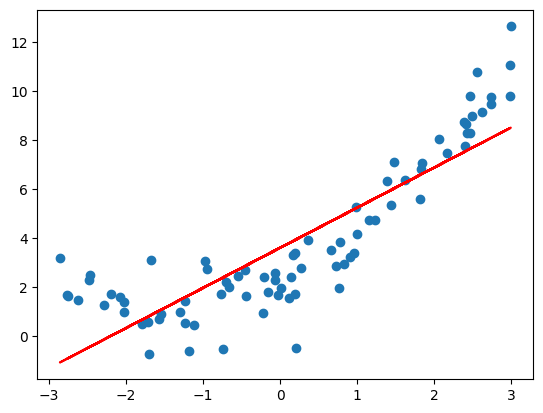

In [30]:
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [32]:
X_train_poly

array([[ 1.00000000e+00,  2.62059133e+00,  6.86749891e+00],
       [ 1.00000000e+00, -7.71528974e-01,  5.95256957e-01],
       [ 1.00000000e+00, -1.78861906e+00,  3.19915814e+00],
       [ 1.00000000e+00, -4.44716656e-01,  1.97772904e-01],
       [ 1.00000000e+00, -6.23164356e-02,  3.88333815e-03],
       [ 1.00000000e+00,  1.15581552e+00,  1.33590952e+00],
       [ 1.00000000e+00,  7.57792499e-01,  5.74249472e-01],
       [ 1.00000000e+00,  2.73977682e+00,  7.50637705e+00],
       [ 1.00000000e+00, -1.30188274e+00,  1.69489868e+00],
       [ 1.00000000e+00,  1.42823324e-01,  2.03985019e-02],
       [ 1.00000000e+00, -2.77115317e+00,  7.67928988e+00],
       [ 1.00000000e+00,  2.55477614e+00,  6.52688111e+00],
       [ 1.00000000e+00,  2.98360867e+00,  8.90192068e+00],
       [ 1.00000000e+00,  1.99973334e-01,  3.99893343e-02],
       [ 1.00000000e+00,  2.16375846e+00,  4.68185067e+00],
       [ 1.00000000e+00,  7.22914052e-01,  5.22604726e-01],
       [ 1.00000000e+00, -2.86055304e+00

In [36]:
from sklearn.metrics import r2_score
regression1=LinearRegression()
regression1.fit(X_train_poly,y_train)
y_pred1=regression1.predict(X_test_poly)
score=r2_score(y_pred1,y_test)
print(score)

0.8518723280577655


In [37]:
print(regression1.coef_)
print(regression1.intercept_)

[[0.         1.46795945 0.52175399]]
[2.1391013]


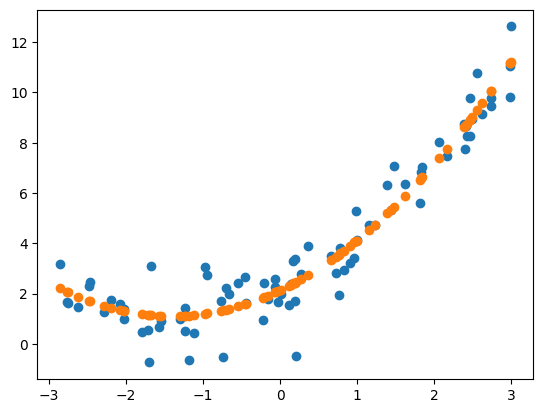

In [38]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression1.predict(X_train_poly))

In [39]:
from sklearn.pipeline import Pipeline

In [47]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)##key,value feature
    ]) 

    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()



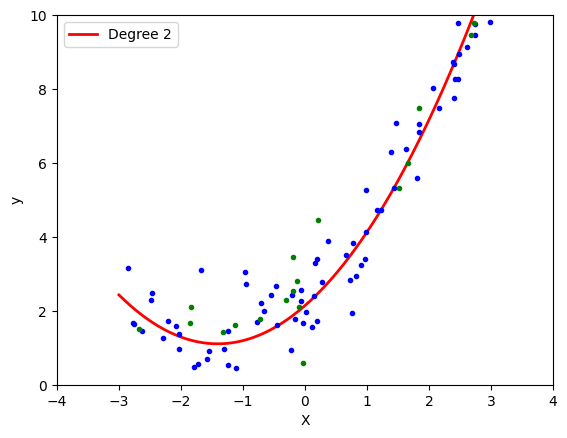

In [51]:
poly_regression(2)